## Writing Efficient Code with pandas

* This chapter will give you an overview of why efficient code matters and selecting specific and random rows and columns efficiently.

<br>

### time.time()
* The time.time() function shows the time (in seconds) since a pre-defined time, which in Unix-based systems is January 1, 1970.

#### Measuring time I
In the lecture slides, you saw how the time.time() function can be loaded and used to assess the time required to perform a basic mathematical operation.

Now, you will use the same strategy to assess two different methods for solving a similar problem: calculate the sum of squares of all the positive integers from 1 to 1 million (1,000,000).

* you will compare two methods; one that uses brute force and one more mathematically sophisticated.


```python
In [7]:
import inspect
In [8]:
lines = inspect.getsource(formula)
In [9]:
lines
Out[9]:
'def formula(N):\n    return N*(N+1)*(2*N+1)/6\n'
```
* Idea of what the loaded in function for the exercise was to import locally in workspace

In [1]:
def formula(N):
    return N * (N +1 ) * (2*N + 1) / 6

def brute_force(N):
    res = 0
    UL = N + 1
    for i in range(1, UL):
        res += i ** 2
    return res

In [2]:
import time
print(dir(time))

['CLOCK_BOOTTIME', 'CLOCK_MONOTONIC', 'CLOCK_MONOTONIC_RAW', 'CLOCK_PROCESS_CPUTIME_ID', 'CLOCK_REALTIME', 'CLOCK_THREAD_CPUTIME_ID', '_STRUCT_TM_ITEMS', '__doc__', '__loader__', '__name__', '__package__', '__spec__', 'altzone', 'asctime', 'clock_getres', 'clock_gettime', 'clock_gettime_ns', 'clock_settime', 'clock_settime_ns', 'ctime', 'daylight', 'get_clock_info', 'gmtime', 'localtime', 'mktime', 'monotonic', 'monotonic_ns', 'perf_counter', 'perf_counter_ns', 'process_time', 'process_time_ns', 'pthread_getcpuclockid', 'sleep', 'strftime', 'strptime', 'struct_time', 'thread_time', 'thread_time_ns', 'time', 'time_ns', 'timezone', 'tzname', 'tzset']


In [3]:
# Calculate the result of the problem using formula() and print the time required
N = 1000000
fm_start_time = time.time()
first_method = formula(N)
print("Time using formula: {} sec".format(time.time() - fm_start_time))

# Calculate the result of the problem using brute_force() and print the time required
sm_start_time = time.time()
second_method = brute_force(N)
print("Time using the brute force: {} sec".format(time.time() - sm_start_time))

Time using formula: 4.863739013671875e-05 sec
Time using the brute force: 0.2638537883758545 sec


In [4]:
words = ['<html>',
 '<head><title>404 Not Found</title></head>',
 '<body>',
 '<center><h1>404 Not Found</h1></center>',
 '<hr><center>nginx</center>',
 '</body>',
 '</html>']

In [5]:
# Store the time before the execution
start_time = time.time()

# Execute the operation
letlist = [wrd for wrd in words if wrd.startswith('b')]

# Store and print the difference between the start and the current time
total_time_lc = time.time() - start_time
print('Time using list comprehension: {} sec'.format(total_time_lc))

# Store the time before the execution
start_time = time.time()

# Execute the operation
letlist = []
for wrd in words:
    if wrd.startswith('b'):
        letlist.append(wrd)
        
# Print the difference between the start and the current time
total_time_fl = time.time() - start_time
print('Time using for loop: {} sec'.format(total_time_fl))

Time using list comprehension: 6.818771362304688e-05 sec
Time using for loop: 8.559226989746094e-05 sec


* Sometimes it's not that obvious to choose the most efficient a priori!

### Row selection: loc[] vs iloc[]
A big part of working with DataFrames is to locate specific entries in the dataset. You can locate rows in two ways:

By a specific value of a column (feature).
By the index of the rows (index). In this exercise, we will focus on the second way.
If you have previous experience with pandas, you should be familiar with the .loc and .iloc indexers, which stands for 'location' and 'index location' respectively. In most cases, the indices will be the same as the position of each row in the Dataframe (e.g. the row with index 13 will be the 14th entry).

In [6]:
import pandas as pd
poker_hands = pd.read_csv('poker_hand.csv')
poker_hands.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [7]:
# Define the range of rows to select: row_nums
row_nums = range(0, 1000)

# Select the rows using .loc[] and row_nums and record the time before and after
loc_start_time = time.time()
rows = poker_hands.loc[row_nums, :]
loc_end_time = time.time()

# Print the time it took to select the rows using .loc
print("Time using .loc[]: {} sec".format(loc_end_time - loc_start_time))

# Select the rows using .iloc[] and row_nums and record the time before and after
iloc_start_time = time.time()
rows = poker_hands.iloc[row_nums, :]
iloc_end_time = time.time()

# Print the time it took to select the rows using .iloc
print("Time using .iloc[]: {} sec".format(iloc_end_time - iloc_start_time))

Time using .loc[]: 0.0018181800842285156 sec
Time using .iloc[]: 0.0005910396575927734 sec


* There is an explanation for that, **.iloc()** takes advantages of the sorted position of each rows, simplifying the computations needed.

#### Column selection: .iloc[] vs by name
In the previous exercise, you saw how the .loc[] and .iloc[] functions can be used to locate specific rows of a DataFrame (based on the index). Turns out, the .iloc[] function performs a lot faster (~ 2 times) for this task!

Another important task is to find the faster function to select the targeted features (columns) of a DataFrame. In this exercise, we will compare the following:

using the index locator .iloc()
using the names of the columns While we can use both functions to perform the same task, we are interested in which is the most efficient in terms of speed.

In [8]:
# Use .iloc to select the first, fourth, fifth, seventh and eighth column and record the times before and after
iloc_start_time = time.time()
cols = poker_hands.iloc[:,[0,3,4,6,7]]
iloc_end_time = time.time()

# Print the time it took
print("Time using .iloc[] : {} sec".format(iloc_end_time - iloc_start_time))

# Use simple column selection to select the first, fourth, fifth, seventh and eighth column and record the times before and after
names_start_time = time.time()
cols = poker_hands.loc[:, ['S1', 'S2', 'R2', 'R3', 'S4']]
names_end_time = time.time()

# Print the time it took
print("Time using selection by name : {} sec".format(names_end_time - names_start_time))

Time using .iloc[] : 0.0008454322814941406 sec
Time using selection by name : 0.001068115234375 sec


#### Random row selection
In this exercise, you will compare the two methods described for selecting random rows (entries) with replacement in a pandas DataFrame:

* The built-in pandas function .random()
* The NumPy random integer number generator np.random.randint()

Generally, in the fields of statistics and machine learning, when we need to train an algorithm, we train the algorithm on the 75% of the available data and then test the performance on the remaining 25% of the data.

In [9]:
import numpy as np
# Extract number of rows in dataset
N=poker_hands.shape[0]

# Select and time the selection of the 75% of the dataset's rows
rand_start_time = time.time()
poker_hands.iloc[np.random.randint(low=0, high=N, size=int(0.75 * N))]
print("Time using Numpy: {} sec".format(time.time() - rand_start_time))

Time using Numpy: 0.0021240711212158203 sec


In [10]:
print(len(np.random.randint(low=0, high=N, size=int(0.75*N)))) # 75% of dataset

18757


In [11]:
# Select and time the selection of the 75% of the dataset's rows using sample()
samp_start_time = time.time()
poker_hands.sample(frac=.75, axis=0, replace = True)
print("Time using .sample: {} sec".format(time.time() - samp_start_time))

Time using .sample: 0.0019354820251464844 sec


* You found the most efficient way to sample random rows from a pandas DataFrame, and it's always the built-in function.
	* dframe.sample() 

In [12]:
# Extract number of columns in dataset
D=poker_hands.shape[1]

# Select and time the selection of 4 of the dataset's columns using NumPy
np_start_time = time.time()
poker_hands.iloc[:,np.random.randint(low=0, high=D, size=4)]
print("Time using NymPy's random.randint(): {} sec".format(time.time() - np_start_time))

# Select and time the selection of 4 of the dataset's columns using pandas
# axis=1 allows you to sample on columns.
pd_start_time = time.time()
poker_hands.sample(4, axis=1)
print("Time using panda's .sample(): {} sec".format(time.time() - pd_start_time))

Time using NymPy's random.randint(): 0.00048732757568359375 sec
Time using panda's .sample(): 0.00033164024353027344 sec


### Replacing scalar values 
In this exercise, we will replace a list of values in our dataset by using the .replace() method with another list of desired values.

```python
# Replace Class 1 to -2 
poker_hands['Class'].replace(1, -2, inplace=True)
# Replace Class 2 to -3
poker_hands['Class'].replace(2, -3, inplace=True)
```

```python
start_time = time.time()

# Replace all the entries that has 'FEMALE' as a gender with 'GIRL'
names['Gender'].loc[names['Gender'] == 'FEMALE'] = 'GIRL'

print("Time using .loc[]: {} sec".format(time.time() - start_time))
Time using .loc[]: 0.005897045135498047 sec
```

```python
start_time = time.time()

# Replace all the entries that has 'FEMALE' as a gender with 'GIRL'
names['Gender'].replace('FEMALE', 'GIRL', inplace=True)

print("Time using .replace(): {} sec".format(time.time() - start_time))
Time using .replace(): 0.002596139907836914 sec
```

In [13]:
names = pd.read_csv('Popular_Baby_Names.csv')
names.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


In [14]:
# Replace all non-Hispanic ethnicities with 'NON HISPANIC'
names.columns.tolist()
names['Ethnicity'].value_counts()

WHITE NON HISPANIC            3365
HISPANIC                      3314
BLACK NON HISPANIC            1704
ASIAN AND PACIFIC ISLANDER    1662
WHITE NON HISP                 637
ASIAN AND PACI                 335
BLACK NON HISP                 328
Name: Ethnicity, dtype: int64

In [15]:
start_time = time.time()

# Replace all non-Hispanic ethnicities with 'NON HISPANIC'
names['Ethnicity'].replace(['BLACK NON HISP', 'BLACK NON HISPANIC', 'WHITE NON HISP' , 'WHITE NON HISPANIC'], 'NON HISPANIC', inplace=False)

print("Time using .replace(): {} sec".format(time.time() - start_time))

Time using .replace(): 0.0024394989013671875 sec


In [16]:
start_time = time.time()

# Replace ethnicities (remember matching indexes for multiple values)
names['Ethnicity'].replace(['ASIAN AND PACI','BLACK NON HISP', 'WHITE NON HISP'], ['ASIAN AND PACIFIC ISLANDER',
'BLACK NON HISPANIC','WHITE NON HISPANIC'], inplace=False)

print("Time using .replace(): {} sec".format(time.time() - start_time))

Time using .replace(): 0.0023682117462158203 sec


In [17]:
poker_hands.columns

Index(['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Class'], dtype='object')

### Replace Values with Dictionary
In this exercise, we will apply the following replacing technique of replacing multiple values using dictionaries on a different dataset.
```python
# Replace every row of the DataFrame listed as 'Royal flush' or 'Straight flush' in the 'Explanation' column to 'Flush'. (Not A Column)
poker_hands.replace({'Royal flush':'Flush', 'Straight flush':'Flush'}, inplace=True)
print(poker_hands['Explanation'].head())
print(poker_hands.head(2))
0    Flush
1    Flush
2    Flush
3    Flush
4    Flush
Name: Explanation, dtype: object
   R1  R2  R3  R4  R5  Class Explanation
0  10  11  13  12   1      9       Flush
1  11  13  10  12   1      9       Flush
```

```python
# Replace the number rank by a string
names['Rank'].replace({1:'FIRST', 2:'SECOND', 3:'THIRD'}, inplace=True)
print(names.head())
<script.py> output:
       Year of Birth  Gender                   Ethnicity Child's First Name  Count    Rank
    0           2011  FEMALE  ASIAN AND PACIFIC ISLANDER             SOPHIA    119   FIRST
    1           2011  FEMALE  ASIAN AND PACIFIC ISLANDER              CHLOE    106  SECOND
    2           2011  FEMALE  ASIAN AND PACIFIC ISLANDER              EMILY     93   THIRD
    3           2011  FEMALE  ASIAN AND PACIFIC ISLANDER             OLIVIA     89       4
    4           2011  FEMALE  ASIAN AND PACIFIC ISLANDER               EMMA     75       5
```

#### Replace more than one column (provide as Key for column in dictionary)

```python
# Replace the rank of the first three ranked names to 'MEDAL'
names.replace({'Rank': {1:'MEDAL', 2:'MEDAL', 3:'MEDAL'}}, inplace=True)

# Replace the rank of the 4th and 5th ranked names to 'ALMOST MEDAL'
names.replace({'Rank': {4:'ALMOST MEDAL', 5:'ALMOST MEDAL'}}, inplace=True)
print(names.head())

<script.py> output:
       Year of Birth  Gender                   Ethnicity Child's First Name  Count          Rank
    0           2011  FEMALE  ASIAN AND PACIFIC ISLANDER             SOPHIA    119         MEDAL
    1           2011  FEMALE  ASIAN AND PACIFIC ISLANDER              CHLOE    106         MEDAL
    2           2011  FEMALE  ASIAN AND PACIFIC ISLANDER              EMILY     93         MEDAL
    3           2011  FEMALE  ASIAN AND PACIFIC ISLANDER             OLIVIA     89  ALMOST MEDAL
    4           2011  FEMALE  ASIAN AND PACIFIC ISLANDER               EMMA     75  ALMOST MEDAL
```


### Create a generator for a pandas DataFrame
As you've seen in the video, you can easily create a generator out of a pandas DataFrame. Each time you iterate through it, it will yield two elements:

the index of the respective row
a pandas Series with all the elements of that row
You are going to create a generator over the poker dataset, imported as poker_hands. Then, you will print all the elements of the 2nd row, using the generator.

In [18]:
# Create a generator over the rows
generator = poker_hands.iterrows()

# Access the elements of the 2nd row
first_element = next(generator)
second_element = next(generator)
print(first_element,'\n',second_element)

(0, S1        1
R1       10
S2        1
R2       11
S3        1
R3       13
S4        1
R4       12
S5        1
R5        1
Class     9
Name: 0, dtype: int64) 
 (1, S1        2
R1       11
S2        2
R2       13
S3        2
R3       10
S4        2
R4       12
S5        2
R5        1
Class     9
Name: 1, dtype: int64)


#### The iterrows() function for looping
You just saw how to create a generator out of a pandas DataFrame. You will now use this generator and see how to take advantage of that method of looping through a pandas DataFrame, still using the poker_hands dataset.

Specifically, we want the sum of the ranks of all the cards, if the index of the hand is an odd number. The ranks of the cards are located in the odd columns of the DataFrame.

In [19]:
data_generator = poker_hands.iterrows()
for idx, row_series in data_generator:
    # Check if index is odd 
    if idx % 2 != 0:
        # The ranks of the cards are located in the odd columns of the DataFrame. (Sum ranks of all cards)
        print(row_series, len(row_series.index.tolist()), row_series.index.tolist())
        # Below is a filter statement for the pandas series (row return type) to only select index values starting with a 'R'
        print([rank for rank in filter(lambda x: str(x).startswith('R'), row_series.index.tolist())])
        rank_columns = [rank for rank in filter(lambda x: str(x).startswith('R'), row_series.index.tolist())]
        # Use loc to conditionaly grab the "index" values in the pandas series matching the above list
        print(sum(row_series.loc[rank_columns]))
        hand_sum = sum(row_series.loc[rank_columns])
        break
        

S1        2
R1       11
S2        2
R2       13
S3        2
R3       10
S4        2
R4       12
S5        2
R5        1
Class     9
Name: 1, dtype: int64 11 ['S1', 'R1', 'S2', 'R2', 'S3', 'R3', 'S4', 'R4', 'S5', 'R5', 'Class']
['R1', 'R2', 'R3', 'R4', 'R5']
47


* Above is just the sum for the first row, to iterate over the dataframe the rank_columns would just be for a variable assignment 

In [20]:
poker_hands.head()

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


### Apply Function
* You're going to try it out on the poker_hands dataset. You will use .apply() to square every cell of the DataFrame. The native Python way to square a number n is n**2.

```python
# Define the lambda transformation
get_square = lambda x: x ** 2

# Apply the transformation
data_sum = poker_hands.apply(get_square)
print(data_sum.head())
<script.py> output:
       S1   R1  S2   R2  S3   R3  S4   R4  S5   R5  Class
    0   1  100   1  121   1  169   1  144   1    1     81
    1   4  121   4  169   4  100   4  144   4    1     81
    2   9  144   9  121   9  169   9  100   9    1     81
    3  16  100  16  121  16    1  16  169  16  144     81
    4  16    1  16  169  16  144  16  121  16  100     81
```
* You can now use the apply function to transform every cell at once.


.apply() is a very useful to iterate through the rows of a DataFrame and apply a specific function.

You will work on a subset of the poker_hands dataset, which includes only the rank of all the five cards of each hand in each row (this subset is generated for you in the script). You're going to get the variance of every hand for all ranks, and every rank for all hands.

```python
# Define a lambda function to return the variance, using the numpy package. Apply the transformation for every row.
get_variance = lambda x: np.var(x)

# Apply the transformation
data_tr = poker_hands[['R1', 'R2', 'R3', 'R4', 'R5']].apply(get_variance, axis=1)
print(data_tr.head())

<script.py> output:
    0    18.64
    1    18.64
    2    18.64
    3    18.64
    4    18.64
    dtype: float64
    
    
# Modify the script to apply the function on every rank. (More or less the axis)
get_variance = lambda x: np.var(x)

# Apply the transformation
data_tr = poker_hands[['R1', 'R2', 'R3', 'R4', 'R5']].apply(get_variance, axis=0)
print(data_tr.head())

R1    14.331
R2    14.175
R3    13.929
R4    13.944
R5    13.986
dtype: float64

```

### Pandas Vectorization in Action
pandas vectorization in action
In this exercise, you will apply vectorization over pandas series to:

* calculate the mean rank of all the cards in each hand (row)
* calculate the mean rank of each of the 5 cards in each hand (column)
* You will use the poker_hands dataset once again to compare both methods' efficiency.


```python
# Calculate the mean rank in each hand
row_start_time = time.time()
mean_r = poker_hands[['R1', 'R2', 'R3', 'R4', 'R5']].mean(axis=1)
print("Time using pandas vectorization for rows: {} sec".format(time.time() - row_start_time))
print(mean_r.head())

# Calculate the mean rank of each of the 5 card in all hands
col_start_time = time.time()
mean_c = poker_hands[['R1', 'R2', 'R3', 'R4', 'R5']].mean(axis=0)
print("Time using pandas vectorization for columns: {} sec".format(time.time() - col_start_time))
print(mean_c.head())

Time using pandas vectorization for rows: 0.005902290344238281 sec
0    9.4
1    9.4
2    9.4
3    9.4
4    9.4
dtype: float64
Time using pandas vectorization for columns: 0.00514674186706543 sec
R1    6.995
R2    7.014
R3    7.014
R4    6.942
R5    6.963
dtype: float64
```

### Vectorization with NumPy arrays using .values()
* Vectorization over pandas Series
* Vectorization over Numpy ndarrays
While these two methods outperform all the other methods, when can vectorization over NumPy ndarrays be used to replace vectorization over pandas Series?
* Vectorization over NumPy ndarrays is always the fastest option, and now you know why!

#### Task
* Your task is to calculate the variance of all the hands in each hand using the vectorization over pandas Series and then modify your code using the vectorization over Numpy ndarrays method.

**Calculate Variance in Each Hand**
```python
# Calculate the variance of the ranks of all the cards in each hand using vectorization with pandas.
start_time = time.time()
poker_var = poker_hands[['R' + str(i) for i in range(1, 6)]].var(axis=1)
print("Time using pandas vectorization: {} sec".format(time.time() - start_time))
print(poker_var.head())
Time using pandas vectorization: 0.004630565643310547 sec
0    23.3
1    23.3
2    23.3
3    23.3
4    23.3
dtype: float64

# Calculate the variance of the ranks of all the cards in each hand using vectorization with NumPy.
# Calculate the variance in each hand
start_time = time.time()
poker_var = poker_hands[['R' + str(i) for i in range(1,6)]].values.var(axis=1, ddof=1)
print("Time using NumPy vectorization: {} sec".format(time.time() - start_time))
print(poker_var[0:5])

Time using NumPy vectorization: 0.004379749298095703 sec
[23.3 23.3 23.3 23.3 23.3]
```



<br>

### Data transformation using .groupby().transform

#### The min-max normalization using .transform()
A very common operation is the **min-max normalization**. It consists in rescaling our value of interest by deducting the minimum value and dividing the result by the difference between the maximum and the minimum value. For example, to rescale student's weight data spanning from 160 pounds to 200 pounds, you subtract 160 from each student's weight and divide the result by 40 (200 - 160).

You're going to define and apply the min-max normalization to all the numerical variables in the restaurant data. You will first group the entries by the time the meal took place (Lunch or Dinner) and then apply the normalization to each group separately.

In [21]:
restaurant_data = pd.read_csv('restaurant_data.csv')
restaurant_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
# Define the min-max normalization using the lambda method.
# Group the data according to the time the meal took place.
# Apply the transformation to the grouped data.

# Define the min-max transformation
min_max_tr = lambda x: round((x - x.min()) / (x.max() - x.min()), 3)

# Group the data according to the time
restaurant_grouped = restaurant_data.groupby('time')[['total_bill', 'tip', 'size']]

# Apply the transformation
restaurant_min_max_group = restaurant_grouped.transform(min_max_tr)
display(restaurant_min_max_group.head())

,total_bill,tip,size
0,0.292,0.001,0.2
1,0.152,0.073,0.4
2,0.376,0.278,0.4
3,0.432,0.257,0.2
4,0.451,0.290,0.6


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,0.343451,0.244102,0.313934
std,0.203406,0.179172,0.190220
min,0.000000,0.000000,0.000000
25%,0.200750,0.111000,0.200000
50%,0.303500,0.222000,0.200000
75%,0.445250,0.321000,0.400000
max,1.000000,1.000000,1.000000


<AxesSubplot: >

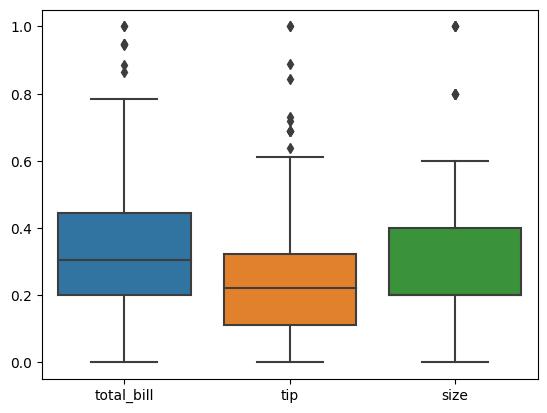

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
display(restaurant_min_max_group.describe())

sns.boxplot(restaurant_min_max_group)

In [24]:
print(len(restaurant_min_max_group), len(restaurant_data))
print(restaurant_grouped.size())
restaurant_groups_statssummary = restaurant_data.groupby('time').describe()

# The first line of the dframe readout for the original data_frame (restaurant_data)
# total_bill - 16.99, tip - 1.01, size - 2
# (16.99 - groupedby_dinner.min (3.07) / (groupedby_dinnner.max 50.81 - groupedby_dinner.min 3.07)

first_total_bill_value = restaurant_data.loc[0, 'total_bill']
# Here is a path to the max values for dinner grouped by values for total_bill
total_bill_max = restaurant_groups_statssummary.loc['Dinner', :].loc['total_bill', 'max']
total_bill_min = restaurant_groups_statssummary.loc['Dinner', :].loc['total_bill', 'min']

# Here is a quick summary of how the first values in the min_max_group is generated
row_one_tbill_max_min_standardized = round((first_total_bill_value - total_bill_min) / (total_bill_max - total_bill_min), 3)
row_one_tbill_max_min_standardized

244 244
time
Dinner    176
Lunch      68
dtype: int64


0.292

In [25]:
display(restaurant_data.groupby('time').describe())

total_bill                                      ... size                    
            count       mean       std   min      25%  ...  min  25%  50%  75%  max
time                                                   ...                         
Dinner      176.0  20.797159  9.142029  3.07  14.4375  ...  1.0  2.0  2.0  3.0  6.0
Lunch        68.0  17.168676  7.713882  7.51  12.2350  ...  1.0  2.0  2.0  2.0  6.0

[2 rows x 24 columns]

### Description of Above
1. lambda series is used for transformation on each groupby column to a max/min decimal value between 0 and 1 (min - 0, max - 1)
2. Groupby the column of interest for max/min eventual value substituion for standardized value
3. Pass the lambda function for the grouped by object which performs the min/max values for that series (Ex - Dinner.TotalBill)
	* This then takes the original dataframe value and standardizes for a max/min values between 0-1 which represents that **time** and columns standardized values against the min/max of that group and column 

<br>

### Transforming values to probabilities
In this exercise, we will apply a probability distribution function to a pandas DataFrame with group related parameters by transforming the tip variable to probabilities.

You're going to apply the exponential distribution transformation to the size of each table in the dataset, after grouping the data according to the time of the day the meal took place. Remember to use each group's mean for the value of λ.

In [26]:
# Define the exponential transformation
exp_tr = lambda x: np.exp(-x.mean() * x) * x.mean()

# Group the data according to the time
restaurant_grouped = restaurant_data.groupby('time')

# Apply the transformation
restaurant_exp_group = restaurant_grouped['tip'].transform(exp_tr)
print(restaurant_exp_group.head())

0    0.135141
1    0.017986
2    0.000060
3    0.000108
4    0.000042
Name: tip, dtype: float64


### Validation of normalization
For this exercise, we will perform a **z-score normalization** and verify that it was performed correctly.

A distinct characteristic of normalized values is that they have a mean equal to zero and standard deviation equal to one.

In [27]:
poker_grouped = poker_hands.groupby('Class')
display(poker_grouped.describe())

S1                                 ...   R5                        
         count      mean       std  min   25%  ...  min   25%  50%    75%   max
Class                                          ...                             
0      12493.0  2.507244  1.119522  1.0  2.00  ...  1.0  4.00  7.0  10.00  13.0
1      10599.0  2.501934  1.114831  1.0  2.00  ...  1.0  4.00  7.0  10.00  13.0
2       1206.0  2.557214  1.096033  1.0  2.00  ...  1.0  3.25  7.0  10.00  13.0
3        513.0  2.557505  1.116770  1.0  2.00  ...  1.0  3.00  6.0  10.00  13.0
4         93.0  2.397849  1.104731  1.0  1.00  ...  1.0  5.00  8.0  10.00  13.0
5         54.0  2.703704  1.175691  1.0  2.00  ...  1.0  4.00  8.0   9.75  13.0
6         36.0  2.611111  1.153325  1.0  1.75  ...  1.0  4.00  7.0   9.25  13.0
7          6.0  3.166667  0.752773  2.0  3.00  ...  5.0  7.25  9.0  12.25  13.0
8          5.0  2.200000  1.303840  1.0  1.00  ...  5.0  5.00  6.0   8.00  13.0
9          5.0  2.800000  1.303840  1.0  2.00  ...  1.0  1.00  1.0  10.00  12.0

[10 rows x 80 columns]

In [28]:
zscore = lambda x: (x - x.mean()) / x.std()

# Apply the transformation
poker_trans = poker_grouped.transform(zscore)
display(poker_trans.head())

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5
0,-1.380537,0.270364,-1.380537,-0.730297,-1.380537,0.631224,-1.380537,0.350823,-1.380537,-0.724286
1,-0.613572,0.495666,-0.613572,1.095445,-0.613572,0.039451,-0.613572,0.350823,-0.613572,-0.724286
2,0.153393,0.720969,0.153393,-0.730297,0.153393,0.631224,0.153393,-1.403293,0.153393,-0.724286
3,0.920358,0.270364,0.920358,-0.730297,0.920358,-1.735866,0.920358,1.227881,0.920358,1.267500
4,0.920358,-1.757363,0.920358,1.095445,0.920358,0.433966,0.920358,-0.526235,0.920358,0.905357


In [29]:
# Re-group the grouped object and print each group's means and standard deviation
poker_regrouped = poker_trans.groupby(poker_hands['Class'])

print(np.round(poker_regrouped.mean(), 3))
print(poker_regrouped.std())

        S1   R1   S2   R2   S3   R3   S4   R4   S5   R5
Class                                                  
0     -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0
1      0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0
2     -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0
3      0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0
4     -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0
5     -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0
6     -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0
7      0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0
8     -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0
9      0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0
        S1   R1   S2   R2   S3   R3   S4   R4   S5   R5
Class                                                  
0      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1

* Now you know that the normalization was performed correctly, as the mean in every normalized group is 0 and the standard deviation is 1!

### When to use transform()?
The **.transform()** function applies a function to all members of each group.
* In the above exercise the transform function was based to the groupby object which was grouped by class and then had the normalizations applied

<br>

### Identifying missing values
The first step before missing value imputation is to identify if there are missing values in our data, and if so, from which group they arise.

For the same **restaurant_data** data you encountered in the lesson, an employee erased by mistake the tips left in 65 tables. The question at stake is how many missing entries came from tables that smokers where present vs tables with no-smokers present.

Your task is to group both datasets according to the smoker variable, count the number or present values and then calculate the difference.

#### Commenting Exercise as DataFrame was populated with nulls 
```python
print(restaurant_nan)
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59   NaN  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# Groupe by dataframe with null values in tip column (here's the count of present values for each column after being grouped by the smoker values)
restaurant_nan.groupby('smoker')[['total_bill', 'tip']].count()
Out[6]:

        total_bill  tip
smoker                 
No             151  110
Yes             93   69


# Group both objects according to smoke condition
restaurant_nan_grouped = restaurant_nan.groupby('smoker')

# Store the number of present values
restaurant_nan_nval = restaurant_nan_grouped['tip'].count()

# Print the group-wise missing entries between the discrepancy with more total bill records than tip counts
print(restaurant_nan_grouped['total_bill'].count() - restaurant_nan_nval)

# axis=1 for row like broadcast values of missing tips for the grouped by smoker objects
smoker
No     41
Yes    24
dtype: int64
```

* Worth noting here that groupby counts only look to include **present** values and excludes null values for total groupby counts

#### Missing value imputation
As the majority of the real world data contain missing entries, replacing these entries with sensible values can increase the insight you can get from our data.

In the restaurant dataset, the "total_bill" column has some missing entries, meaning that you have not recorded how much some tables have paid. Your task in this exercise is to replace the missing entries with the median value of the amount paid, according to whether the entry was recorded on lunch or dinner (time variable)


```python
# Group the data according to the time of each entry.
# Apply and print the pre-defined transformation to impute the missing values in the restaurant_data dataset.

# Define the lambda function
missing_trans = lambda x: x.fillna(x.median())

# Group the data according to time
restaurant_grouped = restaurant_data.groupby('time')

# Apply the transformation
restaurant_impute = restaurant_grouped.transform(missing_trans)
print(restaurant_impute.head())

   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       18.69  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4
```
* You can know replace missing values in a dataset groupwise!

### Data filtration using the filter() function
* we will discuss how we can use the filter() function on a grouped pandas object. This allows us to include only a subset of those groups, based on some specific conditions.
* filter() : Often, after grouping the entries of a DataFrame according to a specific feature, we are interested in including only a subset of those groups, based on some conditions


```python
# grouped by column of interest for filtering
restaurant_data.groupby('day')['total_bill'].describe()
Out[2]:

      count    mean    std   min     25%    50%     75%    max
day                                                           
Fri    19.0  17.152  8.303  5.75  12.095  15.38  21.750  40.17
Sat    87.0  20.441  9.480  3.07  13.905  18.24  24.740  50.81
Sun    76.0  21.410  8.832  7.25  14.987  19.63  25.597  48.17
Thur   62.0  17.683  7.886  7.51  12.442  16.20  20.155  43.11

# Create a new DataFrame containing only the days when the count of total_bill is greater than 40.
# count is a method that the above describe method return is printing out from those method calls on the pandas series groupby objects

# Filter the days where the count of total_bill is greater than $40
total_bill_40 = restaurant_data.groupby('day').filter(lambda x: x['total_bill'].count() > 40)

# Select only the entries that have a mean total_bill greater than $20
total_bill_20 = total_bill_40.groupby('day').filter(lambda x : x['total_bill'].mean() > 20)

# Print the number of tables where total_bill is greater than $40
print('Number of tables where total_bill is greater than $40:', total_bill_40.shape[0])

# Print days of the week that have a mean total_bill greater than $20
print('Days of the week that have a mean total_bill greater than $20:', total_bill_20.day.unique())

Number of tables where total_bill is greater than $40: 225
Days of the week that have a mean total_bill greater than $20: ['Sun' 'Sat']
```